Machine Learning Midterm Assignment 
by Ming Nie mn2984

This assignment is based on my own knowledge and my understanding of the class notes, skicit learn official website and wikipedia.

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import statistics

In answering each of the following questions please include a) the question as a markdown header in your Jupyter notebook, b)  the raw code that you used to generate any results, tables, or figures, and c) the top ten or fewer rows of the data-frame (do not include more than ten rows for any table in your report).

Include any plots or figures generated from your code as well.

Use the spam dataset and variable descriptions in the files/Mid-Term Exam folder of the course website to answer the following questions.   

1.Import the spam dataset and print the first six rows.  

2.Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

ANSWER: The three variables I choose are word_freq_free:(commercials always use this to attract customers), char_freq_!:(spam uses this to draw your attention, in formal emails, people tend to avoid the use of "!"),	char_freq_$:(marketing ads tend to use this to inform the receiver the price of their goods/service). 

In [2]:
df = pd.read_csv(r"C:\Users\14249\OneDrive\Columbia\$ML\midterm\spam_dataset.csv")
df.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
from matplotlib import pyplot as plt 

count = 0
for i in df.columns:
    count += 1
    print(i)
    
print(count)

word_freq_make:
word_freq_address:
word_freq_all:
word_freq_3d:
word_freq_our:
word_freq_over:
word_freq_remove:
word_freq_internet:
word_freq_order:
word_freq_mail:
word_freq_receive:
word_freq_will:
word_freq_people:
word_freq_report:
word_freq_addresses:
word_freq_free:
word_freq_business:
word_freq_email:
word_freq_you:
word_freq_credit:
word_freq_your:
word_freq_font:
word_freq_000:
word_freq_money:
word_freq_hp:
word_freq_hpl:
word_freq_george:
word_freq_650:
word_freq_lab:
word_freq_labs:
word_freq_telnet:
word_freq_857:
word_freq_data:
word_freq_415:
word_freq_85:
word_freq_technology:
word_freq_1999:
word_freq_parts:
word_freq_pm:
word_freq_direct:
word_freq_cs:
word_freq_meeting:
word_freq_original:
word_freq_project:
word_freq_re:
word_freq_edu:
word_freq_table:
word_freq_conference:
char_freq_;:
char_freq_(:
char_freq_[:
char_freq_!:
char_freq_$:
char_freq_#:
capital_run_length_average:
capital_run_length_longest:
capital_run_length_total:
spam
58


3.Visualize the univariate distribution of each of the variables in the previous question.  


<AxesSubplot:>

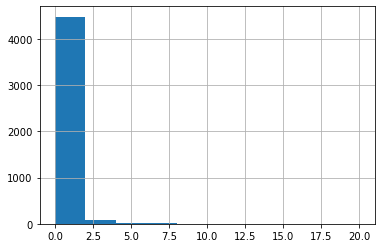

In [4]:
df ['word_freq_free:'].hist()

<AxesSubplot:>

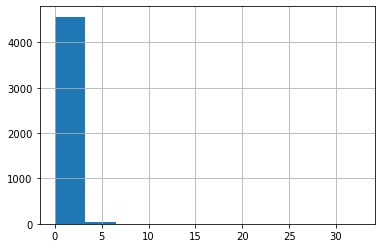

In [5]:
df ['char_freq_!:'].hist()

<AxesSubplot:>

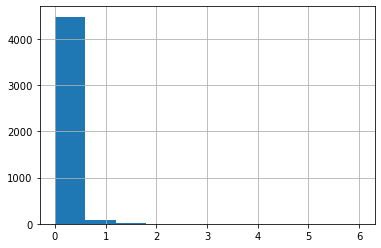

In [6]:
df ['char_freq_$:'].hist()

<AxesSubplot:>

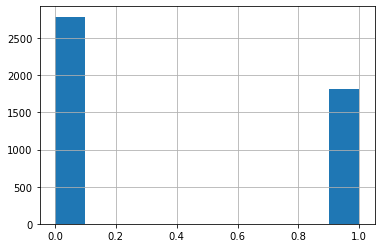

In [7]:
df ['spam'].hist()

4.Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".

ANSWER: K Nearest Neighbor Classification; 
logistic regression; 
penalized logistic regression;
support vector machine;
decision tree classifier;
random forest classifier.

5.Describe the importance of training and test data.  Why do we separate data into these subsets?

ANSWER: We use training test split to prevent overfitting. If we keep training our model on all available data, we probably would get a "perfect" model that can work very well on our data. This is partly because we are tries to explain the noise of the data, which is the part cannot be explained. If we do this, we are adding unneccesary parameters and complexity into our model. As a result, the prediction of the model is compromised by overfitting. A general rule for machine learning is try to keep model as simple as possible.

Using training test split, training data is for model building and cross valiadations. We use cross validation to choose our best model and then use test data, which should be completely new to the model, to test the model's ability for predictive performance.

6.What is k-fold cross validation and what do we use it for?

ANSWER: The k-fold cross validation is the measure we apply on our training data. In a standard k-fold cross validation setting, the training data is partitioned into k folds. The model is built by using k-1 sets.The the model built is tested on the last set. We repeat this operation k times until every single set is used as the test set. The final score of the cross validation is the average of all tests. We use it to prevent overfitting (explained in the previous question) and seleciton bias (lack of randomlization in data selection). We use it as our model selection criteria.

7.How is k-fold cross validation different from stratified k-fold cross validation?

ANSWER: When we have different classes in our data. We might want to use stratified k-fold to ensure each set (both train and test set) has relatively the same percentage of each class as the population. 

8.Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. 

ANSWER: The first model I use is KNN classification.
The choice of K, I used GridSearchCV select the k of the best model based on cross validation score. The input of k is a list of odd numbers to avoid a tie.

In [8]:
y = df['spam']  
X_raw = pd.DataFrame(df, columns = ['word_freq_free:', 'char_freq_!:', 'char_freq_$:'])
from sklearn import preprocessing 
X = preprocessing.scale(X_raw)

print(X_raw.head())
print(X)

   word_freq_free:  char_freq_!:  char_freq_$:
0             0.32         0.778         0.000
1             0.14         0.372         0.180
2             0.06         0.276         0.184
3             0.31         0.137         0.000
4             0.31         0.135         0.000
[[ 0.08617144  0.62400658 -0.30835494]
 [-0.1318249   0.12620315  0.42378306]
 [-0.22871216  0.00849594  0.44005279]
 ...
 [-0.3013776  -0.32991229 -0.30835494]
 [-0.3013776  -0.32991229 -0.30835494]
 [-0.3013776  -0.17664769 -0.30835494]]


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [10]:
# Split data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 16)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [11]:
# KNN Classification 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_KNN = {'n_neighbors': np.arange(1, 57, 2)}

grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_KNN) 

grid_KNN.fit(X_train, y_train) 

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_KNN.best_score_))
print("best parameters: {}".format(grid_KNN.best_params_))
print("test-set score: {:.3f}".format(grid_KNN.score(X_test, y_test))) 

best mean cross-validation score: 0.862
best parameters: {'n_neighbors': 11}
test-set score: 0.870


9.Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

ANSWER: The second model I choose is penalized logistic regression. The input of GridSearch CV is a list all integers from 1 to 100. The best model is the one with c equal to 4.0. 
Its performance is not as good as the previous model.

In [12]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
param_grid_lg = {'C': np.linspace(1, 100, 100)} 
grid_lg = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid_lg)
grid_lg.fit(X_train, y_train) 

print("best mean cross-validation score: {:.3f}".format(grid_lg.best_score_))
print("best parameters: {}".format(grid_lg.best_params_))
print("test-set score: {:.3f}".format(grid_lg.score(X_test, y_test))) 

best mean cross-validation score: 0.830
best parameters: {'C': 4.0}
test-set score: 0.840


10.Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

ANSWER: The third model I use is Support vector machine. C is the squared l2 penality. The smaller the c is, the larger the penalty applies. Smaller C can soften the margin, which means to allow some points go inside the margin for better fitting. Gamma is to define the influence range of a single traing example. For smaller gammas two points can be considered similar even if are far from each other and for larger gammas we require a more strict standard for similarity. The model predicts test data worse than KNN classification model, but better than logistic regression model.


In [13]:
from sklearn.svm import SVC
param_grid_svm = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid_svm = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid_svm)
grid_svm.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_svm.best_score_))
print("best parameters: {}".format(grid_svm.best_params_))
print("test-set score: {:.3f}".format(grid_svm.score(X_test, y_test))) 

best mean cross-validation score: 0.848
best parameters: {'C': 50, 'gamma': 0.001}
test-set score: 0.854


11.Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

ANSWER: The fourth model I choose is decision tree classification. I tune the parameter max_depth from 1 to 20, which controls how many times the internal nodes split and can influence predictive performance. I also tune the criterion parameter, which controls the classification criteria, because the quality of the split can also influence the model performance.

Now the decision tree model is the best one out of the fourth models in terms of the test-set score.


In [14]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(1, 20, 20)}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid_dt)
grid_dt.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_dt.best_score_))
print("best parameters: {}".format(grid_dt.best_params_))
print("test-set score: {:.3f}".format(grid_dt.score(X_test, y_test))) 

best mean cross-validation score: 0.860
best parameters: {'criterion': 'entropy', 'max_depth': 5.0}
test-set score: 0.873


12.Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  




In [15]:
X_raw_2 = pd.DataFrame(df, columns = ['word_freq_free:', 'char_freq_!:', 'char_freq_$:', 'word_freq_address:', 'word_freq_order:', 'word_freq_original:' ])
from sklearn import preprocessing 
X_new = preprocessing.scale(X_raw_2)

print(X_raw_2.head())
print(X_new)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, y, random_state = 16)

   word_freq_free:  char_freq_!:  char_freq_$:  word_freq_address:  \
0             0.32         0.778         0.000                0.64   
1             0.14         0.372         0.180                0.28   
2             0.06         0.276         0.184                0.00   
3             0.31         0.137         0.000                0.00   
4             0.31         0.135         0.000                0.00   

   word_freq_order:  word_freq_original:  
0              0.00                 0.00  
1              0.00                 0.00  
2              0.64                 0.12  
3              0.31                 0.00  
4              0.31                 0.00  
[[ 0.08617144  0.62400658 -0.30835494  0.3308849  -0.32330236 -0.20599311]
 [-0.1318249   0.12620315  0.42378306  0.05190919 -0.32330236 -0.20599311]
 [-0.22871216  0.00849594  0.44005279 -0.16507191  1.9740168   0.33022998]
 ...
 [-0.3013776  -0.32991229 -0.30835494 -0.16507191 -0.32330236 -0.20599311]
 [-0.3013776  -0

In [16]:
grid_dt_2 = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid_dt)
grid_dt_2.fit(X_train_2, y_train_2)

print("best mean cross-validation score: {:.3f}".format(grid_dt_2.best_score_))
print("best parameters: {}".format(grid_dt_2.best_params_))
print("test-set score: {:.3f}".format(grid_dt_2.score(X_test_2, y_test_2))) 

best mean cross-validation score: 0.862
best parameters: {'criterion': 'entropy', 'max_depth': 7.0}
test-set score: 0.869


ANSWER: The performance of this model is relatively the same as previous best decision tree mode with a little bit lower test-set score but a little bit higher CV score.

13.Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

ANSWER: The final model I choose is the KNN classifier, because it has the highest score on cross validation and a good preditvie performance.


In [17]:
grid_KNN_2 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_KNN) 

grid_KNN_2.fit(X_train_2, y_train_2) 

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_KNN_2.best_score_))
print("best parameters: {}".format(grid_KNN_2.best_params_))
print("test-set score: {:.3f}".format(grid_KNN_2.score(X_test_2, y_test_2))) 

best mean cross-validation score: 0.871
best parameters: {'n_neighbors': 11}
test-set score: 0.865


In [18]:
grid_lg_2 = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid_lg)
grid_lg_2.fit(X_train_2, y_train_2) 

print("best mean cross-validation score: {:.3f}".format(grid_lg_2.best_score_))
print("best parameters: {}".format(grid_lg_2.best_params_))
print("test-set score: {:.3f}".format(grid_lg_2.score(X_test_2, y_test_2))) 

best mean cross-validation score: 0.834
best parameters: {'C': 2.0}
test-set score: 0.840


In [19]:
grid_svm_2 = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid_svm)
grid_svm_2.fit(X_train_2, y_train_2)

print("best mean cross-validation score: {:.3f}".format(grid_svm_2.best_score_))
print("best parameters: {}".format(grid_svm_2.best_params_))
print("test-set score: {:.3f}".format(grid_svm_2.score(X_test_2, y_test_2))) 

best mean cross-validation score: 0.858
best parameters: {'C': 50, 'gamma': 0.001}
test-set score: 0.862


14.What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

ANSWER: The inclusion of the appearance of "est","more","most" or "er" date as a variable may increse my final model's predictive power. I think spam may make comparison with the products/service of their competitors, which will lead to the appearance of "er" and "more". And they can also make exaggerated statements that invloves the use of "est" and "most"

15.Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

ANSWER: Linear regression model;
K nearest neighbor regression model;
Ridge regression model;
Lasso regression model;
Decisison Tree Regressor. 